# Representação dos números no computador

Prof. Adenilton J da Silva

### Representações numéricas

* Inteiros: int
* Pontos flutuantes: float
* Complexos: complex

In [1]:
a = 1

In [2]:
type(a)

int

In [3]:
b = 2.0

In [4]:
type(b)

float

In [5]:
c = 1+1j

In [6]:
type(c)

complex

### Float e os erros numéricos

Máximo de memória armazenada: 64 bits

In [7]:
a = 0.1
print(a)

0.1


In [8]:
print('{:.70f}'.format(a))

0.1000000000000000055511151231257827021181583404541015625000000000000000


O que são esses números destacados? →
**<span>
  0.10000000000000000<span style="color: red;">55511151231257827021181583404541015625</span>0000000000000000000000
</span>**

In [9]:
10 * a == 1.0

True

In [10]:
b = a
b = b + a
b = b + a
b = b + a
b = b + a
b = b + a
b = b + a
b = b + a
b = b + a
b = b + a

In [11]:
b == 1.0

False

In [12]:
print(b)

0.9999999999999999


In [13]:
import numpy as np

In [14]:
# Verificando com o isclose para obter mais precisão

np.isclose(b,1.0)

True

In [15]:
# Entendendo a função

help(np.isclose)

Help on _ArrayFunctionDispatcher in module numpy:

isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
    Returns a boolean array where two arrays are element-wise equal within a
    tolerance.

    The tolerance values are positive, typically very small numbers.  The
    relative difference (`rtol` * abs(`b`)) and the absolute difference
    `atol` are added together to compare against the absolute difference
    between `a` and `b`.

    .. warning:: The default `atol` is not appropriate for comparing numbers
                 that are much smaller than one (see Notes).

    Parameters
    ----------
    a, b : array_like
        Input arrays to compare.
    rtol : float
        The relative tolerance parameter (see Notes).
    atol : float
        The absolute tolerance parameter (see Notes).
    equal_nan : bool
        Whether to compare NaN's as equal.  If True, NaN's in `a` will be
        considered equal to NaN's in `b` in the output array.

    Returns
    -------
    y : 

Há limites na representação dos pontos flutuantes.

In [16]:
a = 2.45 * 10**3

In [17]:
b = 2.45e3

In [18]:
a == b

True

In [19]:
np.isclose(a, b)

True

## Entendendo os pontos flutuantes no python

In [20]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

| Campo        | O que significa                                    | Explicação prática                                                                      |
| ------------ | -------------------------------------------------- | --------------------------------------------------------------------------------------- |
| `max`        | Maior float representável                          | \~ 1.8 × 10³⁰⁸ → número gigantesco que você pode representar                            |
| `max_exp`    | Maior expoente em base 2                           | 1024 → o expoente máximo no formato binário                                             |
| `max_10_exp` | Maior expoente em base 10                          | 308 → corresponde a `10³⁰⁸`                                                             |
| `min`        | Menor float positivo normalizado                   | \~ 2.22 × 10⁻³⁰⁸ → menor número positivo que o float consegue representar "normalmente" |
| `min_exp`    | Menor expoente em base 2                           | -1021                                                                                   |
| `min_10_exp` | Menor expoente em base 10                          | -307                                                                                    |
| `dig`        | Dígitos decimais de precisão (\~15)                | O float consegue representar até \~15 dígitos decimais confiáveis                       |
| `mant_dig`   | Dígitos da mantissa em bits                        | 53 bits → a parte fracionária (mantissa) tem 53 bits → isso determina a precisão        |
| `epsilon`    | Diferença mínima entre 1.0 e o próximo float maior | \~ 2.22 × 10⁻¹⁶ → define a **precisão máxima que você pode esperar**                    |
| `radix`      | Base do sistema numérico                           | 2 → binário (o computador trabalha em base 2)                                           |
| `rounds`     | Tipo de arredondamento                             | 1 → arredondamento para o mais próximo (modo padrão IEEE 754)                           |


In [21]:
# Testando os limites

2. * 10. ** 340.

OverflowError: (34, 'Numerical result out of range')

`OverflowError`: erro que ocorre quando o valor de um número excede o limite máximo que pode ser representado no tipo de dado utilizado (indicado em `max`).

In [22]:
# Testando mais limites

1.0 * 10 ** -400

0.0

In [23]:
1.0 * 10 ** -400 == 0.0

True

O que está ocorrendo acima é um outro erro chamado `underflow`.

`Underflow`: erro que ocorre quando um número positivo muito pequeno se aproxima de zero, ficando menor do que o menor valor positivo que o tipo de dado consegue representar (representado em `min`).

* Em operações com números de ponto flutuante muito pequenos, o padrão IEEE 754 permite que números menores que min sejam representados como números denormalizados (também chamados subnormais) → números muito pequenos, com menos precisão, ou, se o número for ainda menor: o valor é convertido para zero.

* 10 ** -400 é 10 elevado a -400, ou seja, um número extremamente pequeno: 1e-400.

* O menor número positivo que o float do Python (IEEE 754 double-precision) consegue representar de forma normalizada é ~2.22e-308 (como vimos em sys.float_info.min).

* Qualquer número menor que isso não cabe mais como número normalizado.

* No entanto, o python não acusou o erro e converteu para 0.

In [24]:
# Testando mais limites - Expoente mínimo

1.0 * 10 ** -308

1e-308

In [25]:
# Testando mais limites - Representação dos dígitos decimais de precisão

a = 0.12345678901234567890123

In [26]:
print('{:.70f}'.format(a))

0.1234567890123456773698862320998159702867269515991210937500000000000000


Perda de precisão (garantia de aproximadamente os 15 primeiros dígitos): indicado em `dig`↴ 

**<span>
  0.12345678901234567<span style="color: red;">7369886232099815970286726951599121093750000000000000000000000000000
</span>**

* Após isso, aparecem erros de aproximação inevitáveis, porque não há bits suficientes na mantissa para representar o número com mais precisão.

* O número tem mais de 20 dígitos decimais, mas o tipo float do Python (que é baseado em double precision IEEE 754) garante precisão apenas até cerca de 15 a 17 dígitos significativos.

#### Garantindo maior precisão

In [27]:
from decimal import Decimal, getcontext

getcontext().prec = 50  # define 50 dígitos de precisão

a = Decimal('0.12345678901234567890123')
print(a)

0.12345678901234567890123


In [28]:
# OBS: não devemos utilizar == para representar floats

In [29]:
# Testando o epsilon - Diferença mínima entre 1.0 e o próximo float maior

1. + sys.float_info.epsilon / 2 == 1.0

True

In [30]:
1. + sys.float_info.epsilon == 1.0

False

* sys.float_info.epsilon é o menor valor positivo que, somado a 1.0, produz um número diferente de 1.0.

* Quando você soma menos que epsilon (por exemplo, epsilon / 2), o número resultante ainda é arredondado para 1.0, porque a diferença é menor que a precisão que o float consegue representar.

* Quando soma exatamente epsilon, o resultado já é diferente de 1.0, porque é o limite mínimo onde a diferença é detectada pela representação do float.

* Qualquer número entre 1.0 e 1.0 + epsilon não pode ser representado exatamente em ponto flutuante — ele é “arredondado” para 1.0.

* Somente a partir de 1.0 + epsilon é possível distinguir um número maior que 1.0 na representação binária do float.

### Cancelamento catastrófico

É um fenômeno de erro numérico que ocorre quando você subtrai dois números muito próximos entre si e, por causa da precisão limitada dos números de ponto flutuante, o resultado perde muitos dígitos significativos, ficando altamente impreciso.

In [31]:
a = np.sqrt(2)
print(a)

1.4142135623730951


In [32]:
a ** 2. - 2.

4.440892098500626e-16

In [33]:
(a ** 2. - 2.) * 1e20

44408.92098500626

**Tipos de erros**

Arredondamento: devido à precisão dos números de ponto flutuante.

Discretização

Modelagem: Ao desconsiderar algumas variáveis do problema.

Entrada: Possíveis erros de medição.

### Representações binárias para decimais e erros

In [34]:
teste1 = 0.1

In [36]:
print('{:.70f}'.format(teste1))

0.1000000000000000055511151231257827021181583404541015625000000000000000


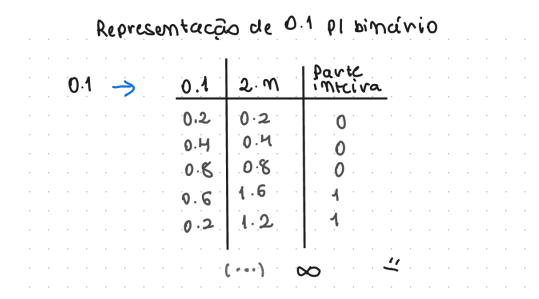

→ Como não cabe uma dízima infinita em um número de bits finito (ex.: 64 bits), o computador armazena uma aproximação de 0.1  
→ Essa aproximação é muito próxima de 0.1, mas não é exatamente 0.1  

In [35]:
teste2 = 0.625

In [37]:
print('{:.70f}'.format(teste2))

0.6250000000000000000000000000000000000000000000000000000000000000000000


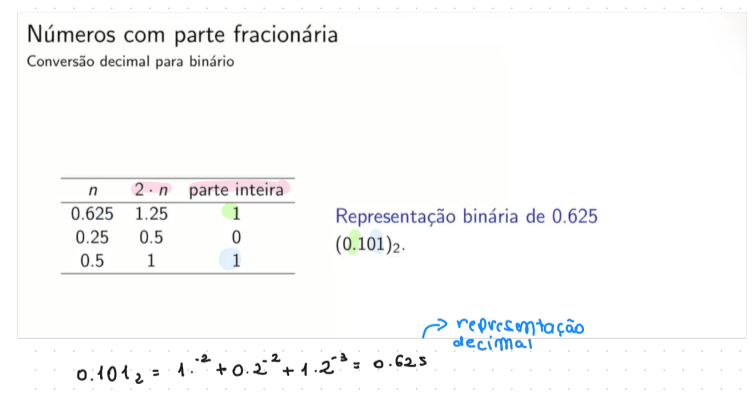